# Exploratory Data Analysis for all Data Roles

In [39]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Roles to explore

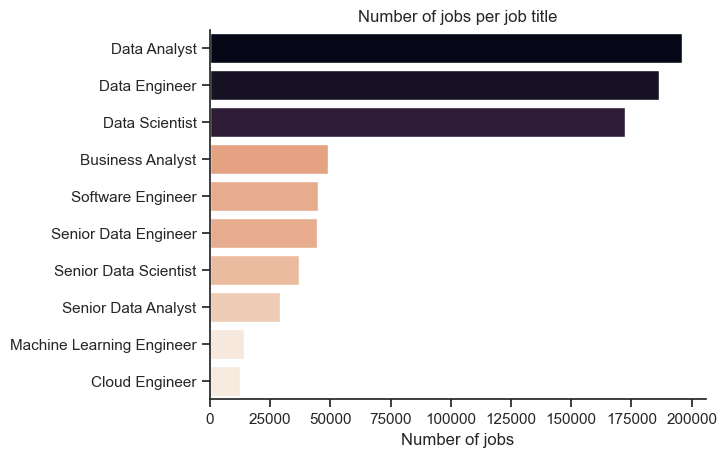

In [35]:
df_plot = df['job_title_short'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x= 'count', y= 'job_title_short', hue='count', palette='rocket_r',legend= False)
sns.despine()
plt.title('Number of jobs per job title')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

Countries to explore 

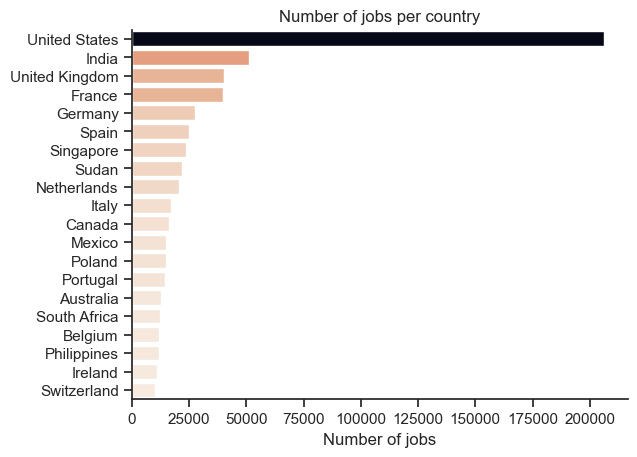

In [37]:
df_plot = df['job_country'].value_counts().head(20).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x= 'count', y= 'job_country', hue='count', palette='rocket_r',legend= False)
sns.despine()
plt.title('Number of jobs per country')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

# Exploratory Data Analysis for Data Analysts in the US


Filter for US Data Analyst roles

In [4]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')]

Locations to explore 

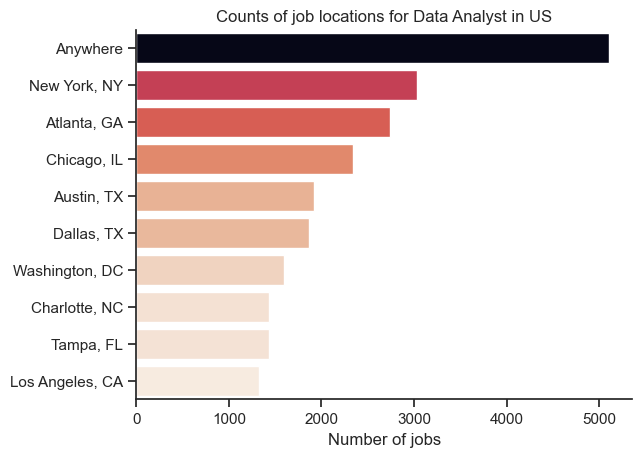

In [23]:
df_plot = df_DA_USA['job_location'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x= 'count', y= 'job_location', hue='count', palette='rocket_r',legend= False)
sns.despine()
plt.title('Counts of job locations for Data Analyst in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()


Job Opportunities

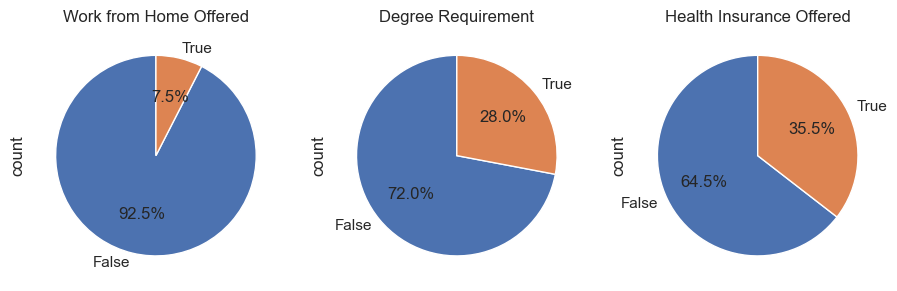

In [32]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    df_DA_USA[column].value_counts().plot(kind='pie', ax=ax[i],autopct = '%1.1f%%', startangle= 90 )
    ax[i].set_title(title)

plt.show()


Companies to explore

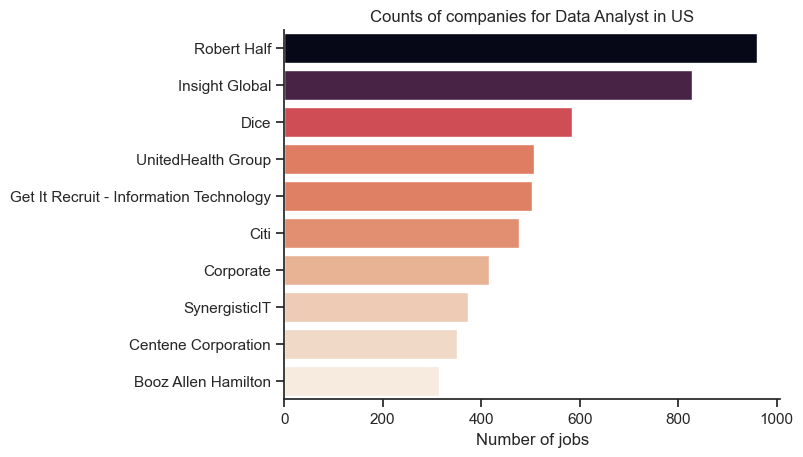

In [33]:
df_plot = df_DA_USA['company_name'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x= 'count', y= 'company_name', hue='count', palette='rocket_r',legend= False)
sns.despine()
plt.title('Counts of companies for Data Analyst in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()